In [3]:

!pip install pandas
import pandas as pd

def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [4]:
import os
print(os.getcwd())
# Path to the file to be imported
path = r"C:\Users\medra\OneDrive\Documentos\Fernanda\Cursos\GitHub\Curso_Python_Fer\Modelab-Python\data\Terminos_lagoon_TA_DIC__2023_RawData.csv"

# Import the file
CO2Data = import_csv(path)

c:\Users\medra\OneDrive\Documentos\Fernanda\Cursos\GitHub\Curso_Python_Fer\Ejercicios


In [5]:
# Print the number of rows and columns in the DataFrame
print(CO2Data.shape)

(106, 21)


In [6]:
# 2. Crear nueva columna con el ratio TA/DIC
CO2Data["TA_DIC_ratio"] = CO2Data["TA_micromol_kg"] / CO2Data["DIC_micromol_kg"]
CO2Data["TA_DIC_ratio"]

0      0.986718
1      0.996485
2      0.995704
3      1.088628
4      1.032445
         ...   
101    1.050092
102    1.075436
103    1.095475
104    1.076392
105    1.093627
Name: TA_DIC_ratio, Length: 106, dtype: float64

In [7]:
# 3. Media y desviación estándar por temporada (Season)
season_stats = CO2Data.groupby("Season")["TA_DIC_ratio"].agg(["mean", "std"]).reset_index()
season_stats

,Season,mean,std
0,Dry,1.058558,0.086111
1,Rainy,1.022350,0.100924


In [8]:
# 4. Media y desviación estándar por temporada y área (Season + Area)
season_area_stats = CO2Data.groupby(["Season", "Area"])["TA_DIC_ratio"].agg(["mean", "std"]).reset_index()
season_area_stats

,Season,Area,mean,std
0,Dry,Coast,1.115766,0.115033
1,Dry,Plume,1.059687,0.035574
2,Dry,River,1.000221,0.037747
3,Rainy,Coast,1.090127,0.129658
4,Rainy,Plume,1.025544,0.049222
5,Rainy,River,0.945217,0.025084


In [9]:
# 5. Guardar ambos resultados en un Excel con dos hojas
!pip install openpyxl
with pd.ExcelWriter("TA_DIC_Season_Areas.xlsx") as writer:
    season_stats.to_excel(writer, sheet_name="Season", index=False)
    season_area_stats.to_excel(writer, sheet_name="Season_Area", index=False)

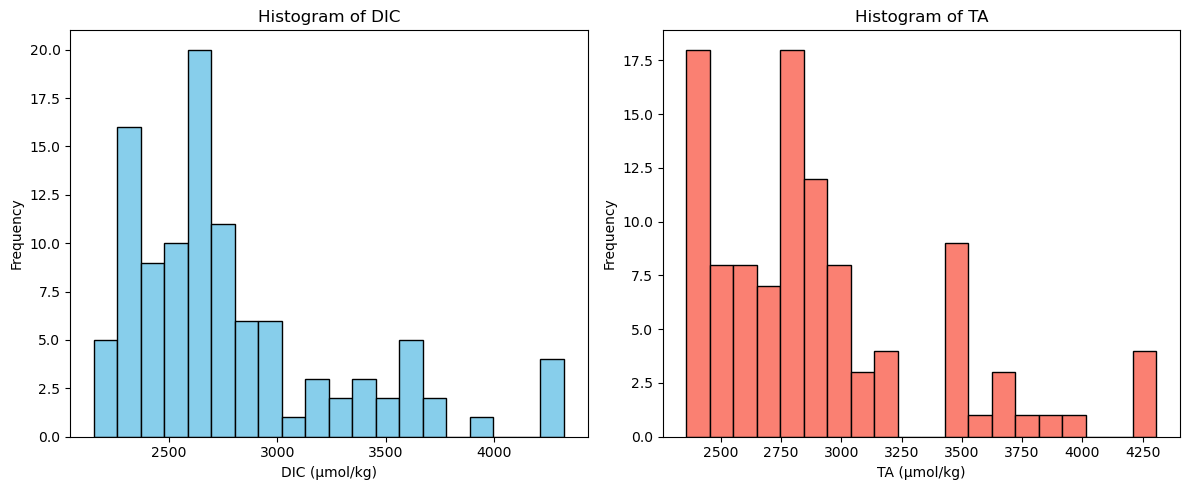

In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12,5))

# Histograma DIC
plt.subplot(1,2,1)
plt.hist(CO2Data["DIC_micromol_kg"], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of DIC")
plt.xlabel("DIC (μmol/kg)")
plt.ylabel("Frequency")

# Histograma TA
plt.subplot(1,2,2)
plt.hist(CO2Data["TA_micromol_kg"], bins=20, color='salmon', edgecolor='black')
plt.title("Histogram of TA")
plt.xlabel("TA (μmol/kg)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [11]:
!Pip install seaborn 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

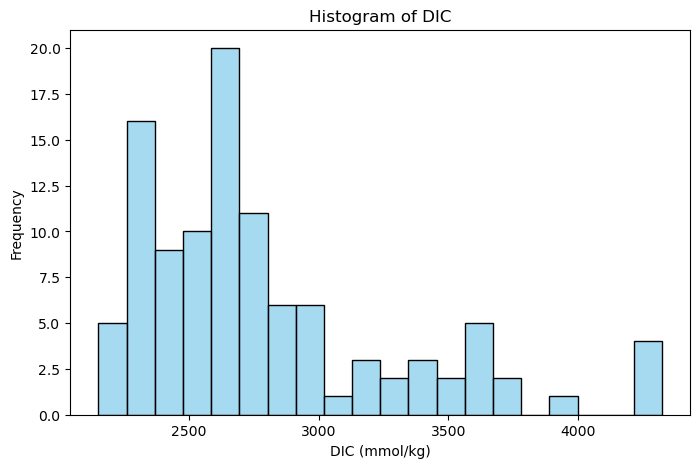

C:\Users\medra\AppData\Local\Temp\ipykernel_1540\4188861156.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=CO2Data, x="Season", y="TA_micromol_kg", palette="pastel")


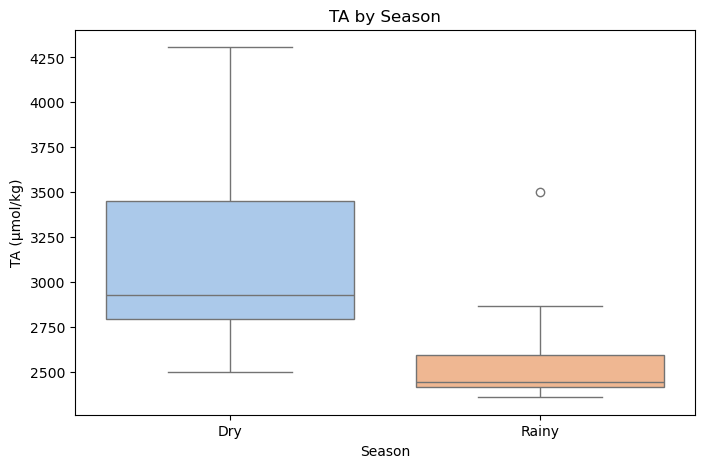

C:\Users\medra\AppData\Local\Temp\ipykernel_1540\4188861156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=CO2Data, x="Season", y="TA_micromol_kg", palette="pastel")


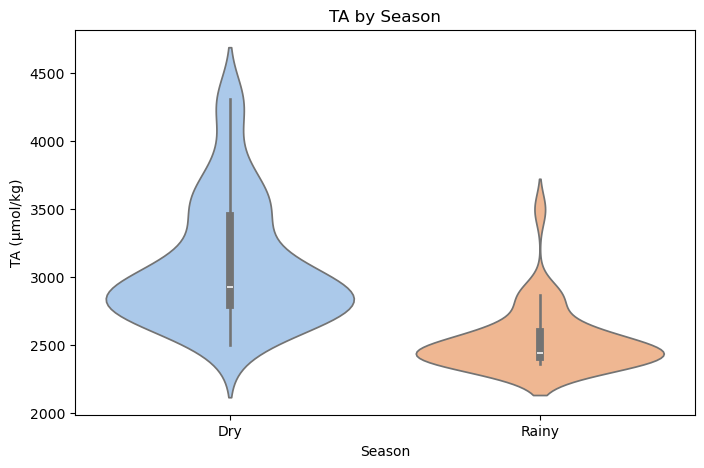

In [ ]:
# Ejemplo 1: Histograma de DIC con unidades en mmol/kg
plt.figure(figsize=(8,5))
sns.histplot(CO2Data["DIC_micromol_kg"], bins=20, color='skyblue')
plt.xlabel("DIC (mmol/kg)")   
plt.ylabel("Frequency")
plt.title("Histogram of DIC")
plt.show()

# Ejemplo 2: Boxplot de TA por Season, unidades en μmol/kg
plt.figure(figsize=(8,5))
sns.boxplot(data=CO2Data, x="Season", y="TA_micromol_kg", palette="pastel")
plt.ylabel("TA (μmol/kg)")  
plt.xlabel("Season")
plt.title("TA by Season")
plt.show()

#Ejemplo 3: Violinplot
plt.figure(figsize=(8,5))
sns.violinplot(data=CO2Data, x="Season", y="TA_micromol_kg", palette="pastel")
plt.ylabel("TA (μmol/kg)")  
plt.xlabel("Season")
plt.title("TA by Season")
plt.show()


In [ ]:
#When to use Kolmogorov-Smirnov vs Shapiro-Wilk
#Prueba de Shapiro-Wilk
#Más potente para detectar desviaciones de la normalidad
#Se recomienda para muestras pequeñas y medianas (n < 2000).
#Hipótesis nula (H₀): los datos provienen de una distribución normal.

#Prueba de Kolmogorov-Smirnov
#Compara la distribución de tus datos con una distribución teórica (ej. normal).
#Menos potente que Shapiro-Wilk.
#Es más adecuada para muestras grandes (n > 2000), cuando Shapiro-Wilk puede ser demasiado sensible o pesado computacionalmente.

In [ ]:
!pip install pandas
!pip install scipy

import pandas as pd
from scipy.stats import shapiro

# Load your data
path = "C:/Users/medra/OneDrive/Documentos/Fernanda/Cursos/GitHub/Curso_Python_Fer/Modelab-Python/data/Terminos_lagoon_TA_DIC__2023_RawData.csv"
CO2Data = pd.read_csv(path)

print(CO2Data.columns)

DIC = CO2Data['DIC_micromol_kg'].dropna()
Salinity = CO2Data['Sal_psu'].dropna()

# Prueba Shapiro-Wilk para DIC
shapiro_DIC = shapiro(DIC)
print("Shapiro-Wilk Test DIC:")
print(f"Statistic: {shapiro_DIC.statistic}, p-value: {shapiro_DIC.pvalue}")

# Prueba de Shapiro-Wilk para Salinidad
shapiro_Salinity = shapiro(Salinity)
print("\nShapiro-Wilk Test Salinity:")
print(f"Statistic: {shapiro_Salinity.statistic}, p-value: {shapiro_Salinity.pvalue}")

print("\nInterpretación:")
print("Si p-value > 0.05 → No se rechaza normalidad")
print("Si p-value < 0.05 → Se rechaza normalidad")

    

Index(['Sample', 'Date', 'Estuary', 'Area', 'Station', 'Layer_depth', 'Season',
       'Chlorophy_microg_L', 'Cond_microsiemens_cm', 'Depth_m',
       'DO_percent_sat', 'DO_mg_L', 'Sal_psu', 'Sp_cond_microsiemens_cm',
       'Turbidity_fnu', 'Temp_C', 'latitude', 'longitude', 'DIC_micromol_kg',
       'TA_micromol_kg', 'dummy_data'],
      dtype='object')
Shapiro-Wilk Test DIC:
Statistic: 0.8599736220688631, p-value: 1.3836938477781853e-08

Shapiro-Wilk Test Salinity:
Statistic: 0.8866640922105421, p-value: 1.8388502511052347e-07

Interpretación:
Si p-value > 0.05 → No se rechaza normalidad
Si p-value < 0.05 → Se rechaza normalidad


Valores únicos de la columna de grupos: ['Dry' 'Rainy']
Mann-Whitney U Test DIC (Dry vs Rainy): U=1942.5, p=1.1746695070093673e-06
Mann-Whitney U Test Temp (Dry vs Rainy): U=551.0, p=5.317160670684041e-06


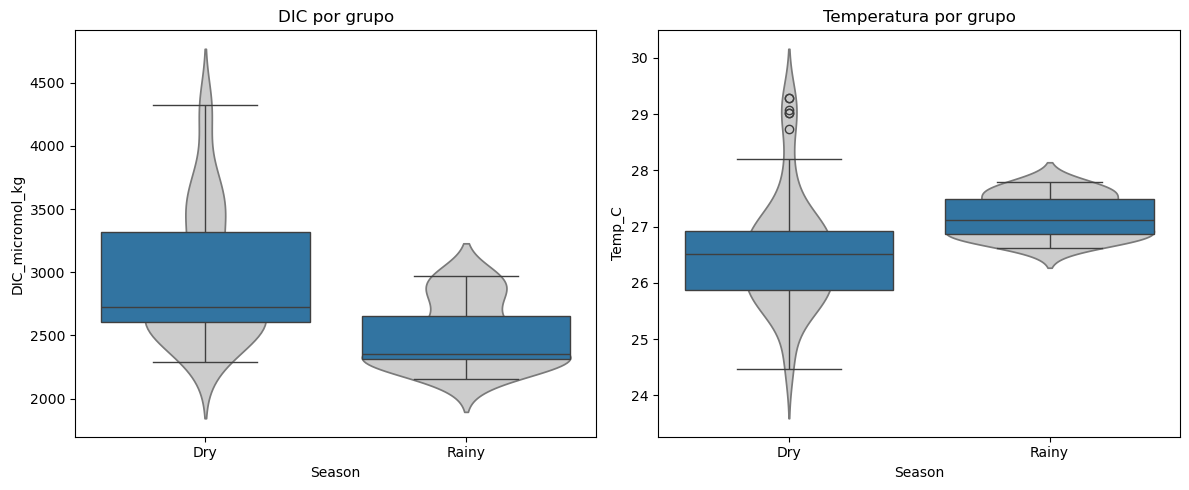

In [29]:
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
path = "C:/Users/medra/OneDrive/Documentos/Fernanda/Cursos/GitHub/Curso_Python_Fer/Modelab-Python/data/Terminos_lagoon_TA_DIC__2023_RawData.csv"
CO2Data = pd.read_csv(path)

# Variables
DIC_col = 'DIC_micromol_kg'
Temp_col = 'Temp_C'

group_col = 'Season'
print("Valores únicos de la columna de grupos:", CO2Data[group_col].unique())

# Extraer los dos grupos
groups = CO2Data[group_col].dropna().unique()
if len(groups) != 2:
    raise ValueError("La columna de grupo no tiene exactamente dos categorías, no se puede hacer Mann-Whitney")

group1_name, group2_name = groups

group1_DIC = CO2Data[CO2Data[group_col]==group1_name][DIC_col].dropna()
group2_DIC = CO2Data[CO2Data[group_col]==group2_name][DIC_col].dropna()

group1_Temp = CO2Data[CO2Data[group_col]==group1_name][Temp_col].dropna()
group2_Temp = CO2Data[CO2Data[group_col]==group2_name][Temp_col].dropna()

# Mann-Whitney U Test para DIC
u_DIC, p_DIC = mannwhitneyu(group1_DIC, group2_DIC)
print(f"Mann-Whitney U Test DIC ({group1_name} vs {group2_name}): U={u_DIC}, p={p_DIC}")

# Mann-Whitney U Test para Temp
u_Temp, p_Temp = mannwhitneyu(group1_Temp, group2_Temp)
print(f"Mann-Whitney U Test Temp ({group1_name} vs {group2_name}): U={u_Temp}, p={p_Temp}")

# Visualización
plt.figure(figsize=(12,5))

# DIC
plt.subplot(1,2,1)
sns.boxplot(x=group_col, y=DIC_col, data=CO2Data)
sns.violinplot(x=group_col, y=DIC_col, data=CO2Data, inner=None, color=".8")
plt.title("DIC por grupo")

# Temp
plt.subplot(1,2,2)
sns.boxplot(x=group_col, y=Temp_col, data=CO2Data)
sns.violinplot(x=group_col, y=Temp_col, data=CO2Data, inner=None, color=".8")
plt.title("Temperatura por grupo")

plt.tight_layout()
plt.show()

Grupos disponibles: ['CDL01' 'CDL02' 'CDL03' 'CDL04' 'CDL05' 'CDL06' 'CDL07' 'CDL08' 'CDL09'
 'PLZ01' 'PLZ02' 'PLZ03' 'PLZ04' 'PLZ05' 'PLZ06' 'PLZ07' 'PLZ08' 'PLZ09']
Kruskal-Wallis Test DIC by Station: statistic=72.32370804971816, p-value=8.552531499354445e-09
Kruskal-Wallis Test Temp by Station: statistic=20.61021080103386, p-value=0.2442124278499778


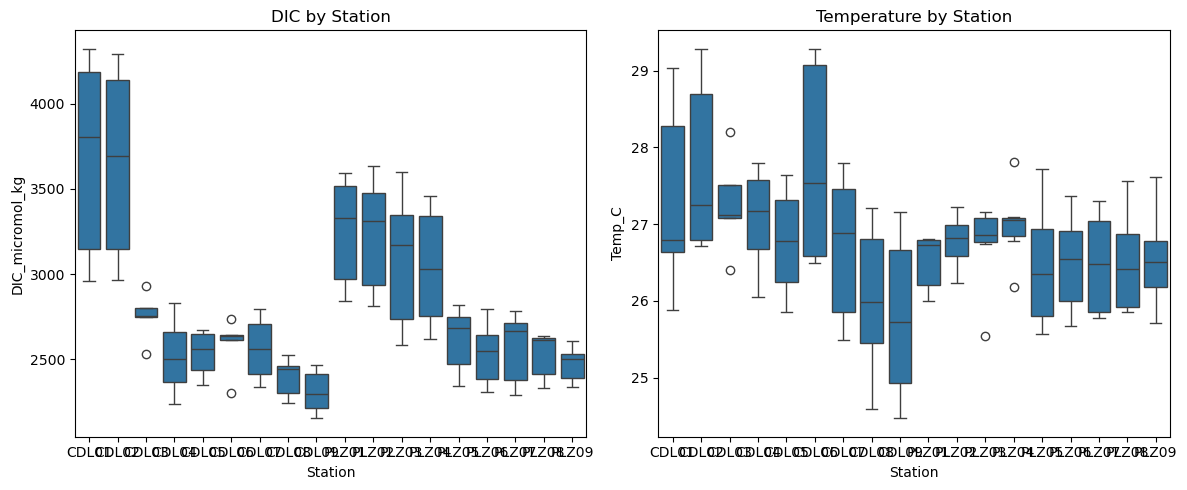

In [30]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
path = "C:/Users/medra/OneDrive/Documentos/Fernanda/Cursos/GitHub/Curso_Python_Fer/Modelab-Python/data/Terminos_lagoon_TA_DIC__2023_RawData.csv"
CO2Data = pd.read_csv(path)

# Columnas
DIC_col = 'DIC_micromol_kg'
Temp_col = 'Temp_C'
group_col = 'Station'  # Columna categórica con varios grupos

# Revisar valores únicos
print("Grupos disponibles:", CO2Data[group_col].unique())

# Preparar grupos para DIC
groups_DIC = [group[DIC_col].dropna() for name, group in CO2Data.groupby(group_col)]
# Kruskal-Wallis test DIC
stat_DIC, p_DIC = kruskal(*groups_DIC)
print(f"Kruskal-Wallis Test DIC by {group_col}: statistic={stat_DIC}, p-value={p_DIC}")

# Preparar grupos para Temp
groups_Temp = [group[Temp_col].dropna() for name, group in CO2Data.groupby(group_col)]
# Kruskal-Wallis test Temp
stat_Temp, p_Temp = kruskal(*groups_Temp)
print(f"Kruskal-Wallis Test Temp by {group_col}: statistic={stat_Temp}, p-value={p_Temp}")

# Boxplots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=group_col, y=DIC_col, data=CO2Data)
plt.title(f"DIC by {group_col}")

plt.subplot(1,2,2)
sns.boxplot(x=group_col, y=Temp_col, data=CO2Data)
plt.title(f"Temperature by {group_col}")

plt.tight_layout()
plt.show()